# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [1]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score
import missingno as msg 
import seaborn as sns

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

### Questions:
1. **Data Checks and Preprocessing:**
   - Read in soil_measures.csv and perform data checks:
      - Determine the number of crops.
      - Check for missing values.
      - Verify that data in potential feature columns is numeric.

In [148]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [149]:
change_category = lambda x : x.astype('category')
crops['crop'] = crops[['crop']].apply(change_category)
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   N       2200 non-null   int64   
 1   P       2200 non-null   int64   
 2   K       2200 non-null   int64   
 3   ph      2200 non-null   float64 
 4   crop    2200 non-null   category
dtypes: category(1), float64(1), int64(3)
memory usage: 71.7 KB


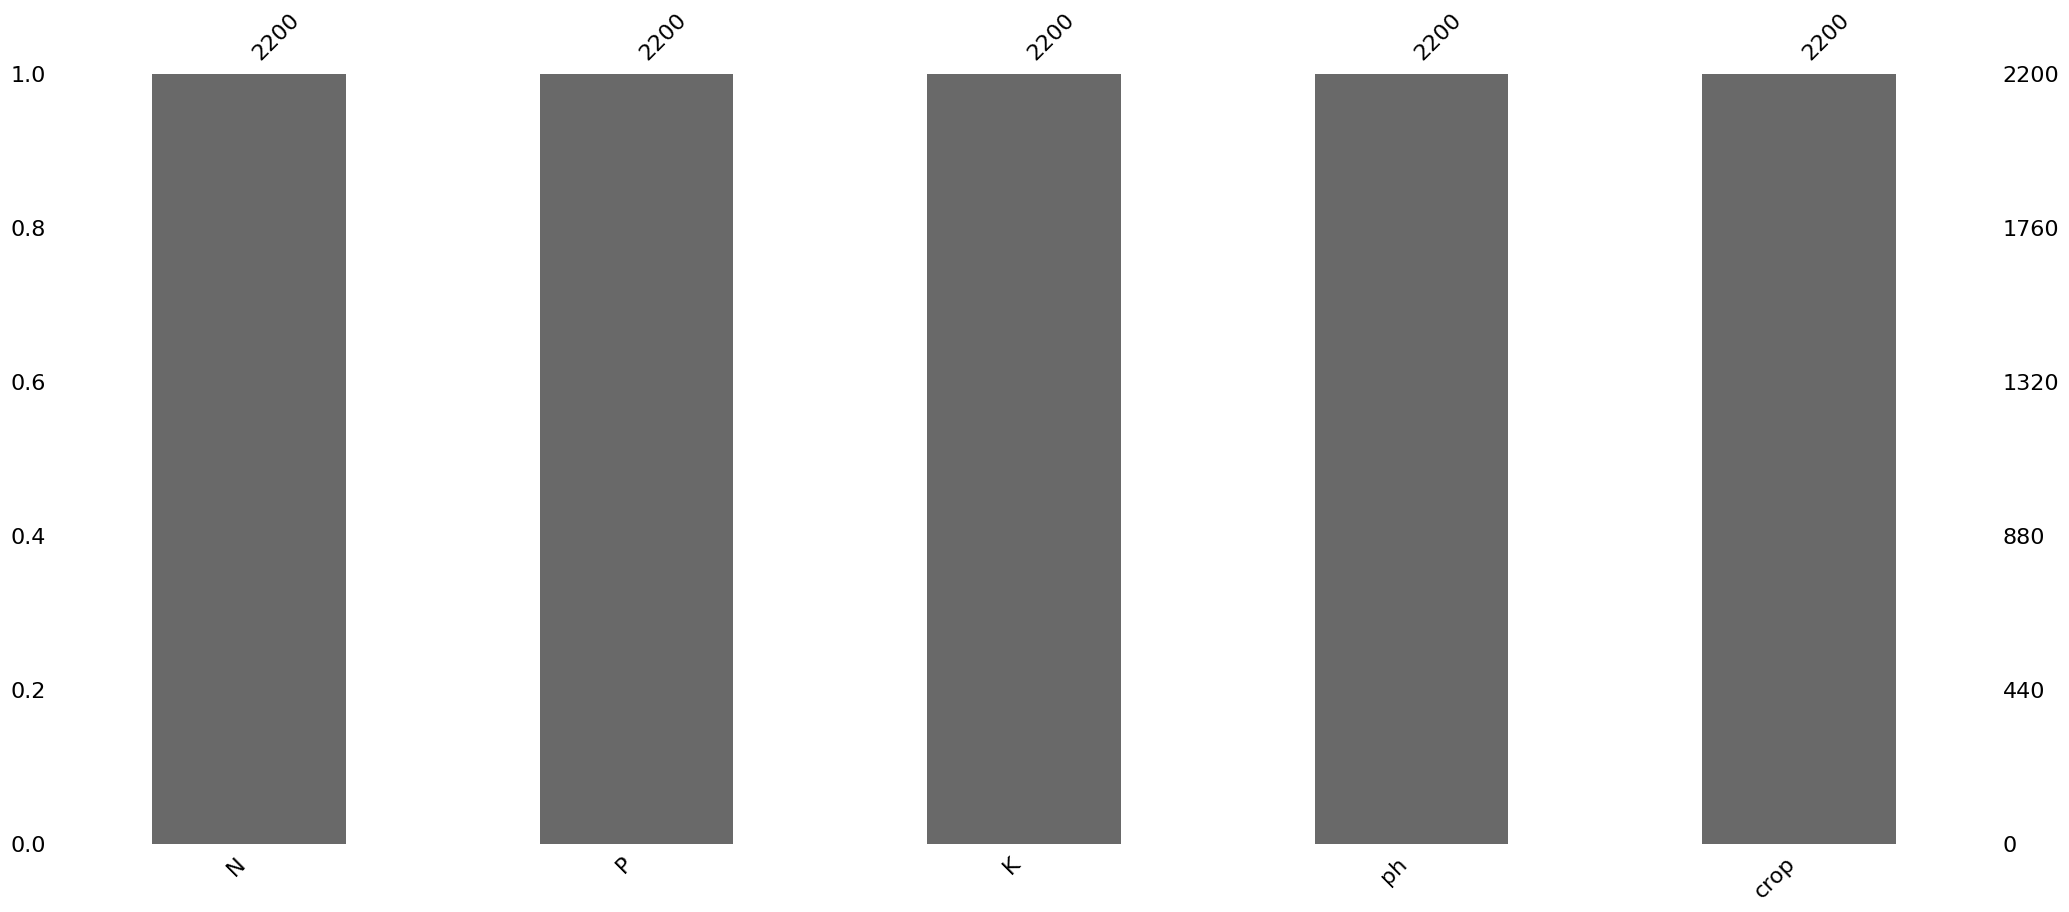

In [150]:
msg.bar(crops)
plt.show()

In [151]:
crops.columns

Index(['N', 'P', 'K', 'ph', 'crop'], dtype='object')

2. **Data Splitting:**
   - Split the data into training and test sets:
      - Set test_size to 20%.
      - Use a random_state of 42.

In [152]:
y = crops['crop']
X = crops.drop(labels=['crop'], axis = 1)
X_train ,X_test , y_trian, y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
print(X_train.shape , X_test.shape)

(1760, 4) (440, 4)


**Individual Feature Prediction:**
   - Loop over all features, and for each feature:
      - Fit a Logistic Regression model with max_iter=2000 and an appropriate multi_class value.
      - Calculate f1_score for the model.

In [153]:
model = LogisticRegression(max_iter=2000 , multi_class= 'multinomial')
model.fit(X_train , y_trian)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [154]:
pred = model.predict(X_test)
feature_performance = f1_score(y_test.values , pred ,average='weighted')
feature_performance

0.6519082593270595

**Correlation Analysis:**
   - Perform correlation analysis for each pair of features to avoid multicollinearity.

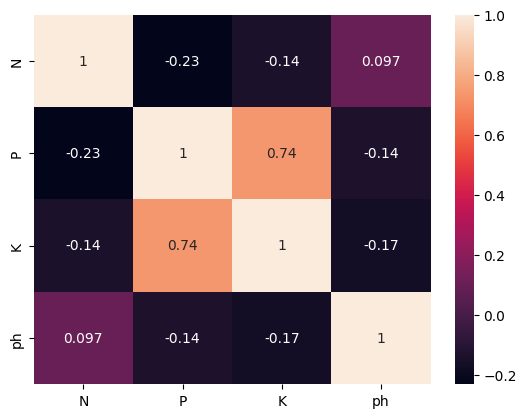

In [155]:
sns.heatmap(crops.corr() , annot =True)
plt.show()

In [156]:
final_features =  ["N", "K", "ph"]

**Final Model Training and Evaluation:**
   - Select final features based on analysis.
   - Train and test a new Logistic Regression model named log_reg with max_iter=2000 and multi_class='multinomial'.
   - Evaluate model performance using f1_score, saving the result as model_performance.

In [157]:
X = crops.drop(['ph' , 'crop'] , axis = 1)
y = crops['crop']
X_train ,X_test , y_train , y_test = train_test_split(crops[final_features] , y , test_size=0.2 , random_state=42)
print(X_train.shape , X_test.shape)

(1760, 3) (440, 3)


In [158]:
log_reg = LogisticRegression(max_iter=2000 , multi_class= 'multinomial')
log_reg.fit(X_train , y_trian)
prediction = log_reg.predict(X_test)
model_performance = f1_score(y_test.values , prediction ,average='weighted')